# Linear Regression
Using the tools for training I made

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm, tqdm_notebook

import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

import bicep
from bicep.hooks import Recorder, ProgressBar

In [27]:
plt.rcParams['figure.figsize'] = (12, 8)

In [28]:
rs = np.random.RandomState(100)
device = torch.device("cpu")

In [29]:
n_points = 100
x = torch.linspace(-10, 10, n_points).view(-1, 1).to(device)
y = 5 * x + 1 + torch.from_numpy(rs.normal(0, 5, size=n_points)).view(-1, 1).to(x)

<IPython.core.display.Javascript object>


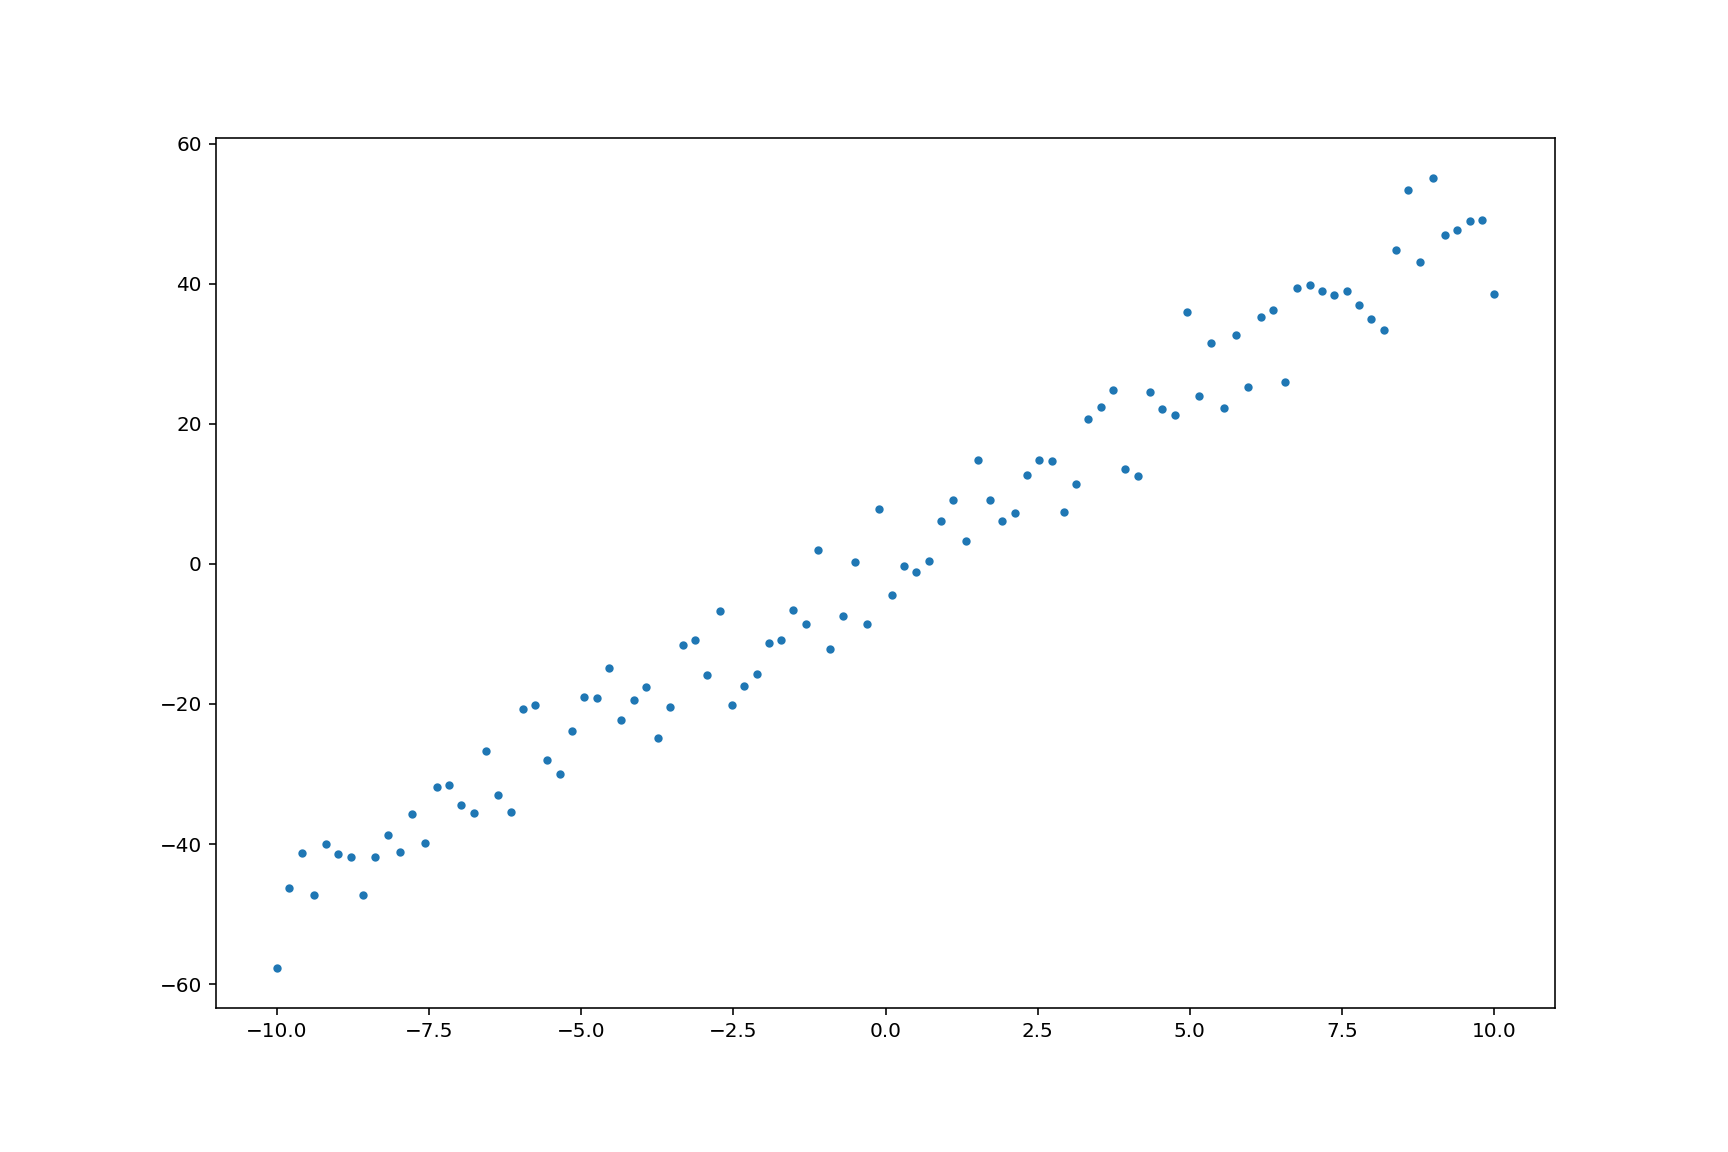

In [30]:
plt.scatter(x, y, s=10)

In [6]:
class LinearModel(nn.Module):
    def __init__(self, in_dims=1, out_dims=1):
        super().__init__()
        self.linear = nn.Linear(in_dims, out_dims)
    
    def forward(self, x):
        return self.linear(x)
    

def dataloader():
    while True:
        yield x, y

At the moment this just waits until all the lines are done plotting and then charts them all..

In [70]:
class UpdatingPredictionPlotter:
    def __init__(self, train_x, train_y):
        self.train_x = train_x
        self.train_y = train_y
        
        self.fig = None
        self.ax = None
        self._last_line = None
    
    def __call__(self, state):
        if self.fig is None:
            plt.ion()
            self.fig, self.ax = plt.subplots(1)
            self.ax.scatter(self.train_x, self.train_y, marker=".", color="C1")
        else:
            self._last_line.remove()
        self._last_line = self.ax.plot(self.train_x, state.model(self.train_x).cpu(), color="C0")[0]
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        

In [67]:
niters = 5000

In [71]:
model = LinearModel()
model.to(device)
optimiser = optim.Adam(model.parameters(), lr=0.1)

trainer = bicep.ModelTrainer(
    dataloader(),
    F.mse_loss
)

loss_recorder = Recorder('loss')
progress_bar = ProgressBar(notebook=True, total=niters)
trainer.add_hook(loss_recorder, freq=1)
trainer.add_hook(progress_bar, 1)
# trainer.add_hook(UpdatingPredictionPlotter(x, y), 100)
# trainer.add_hook(lambda state: time.sleep(5), 100)

<IPython.core.display.Javascript object>


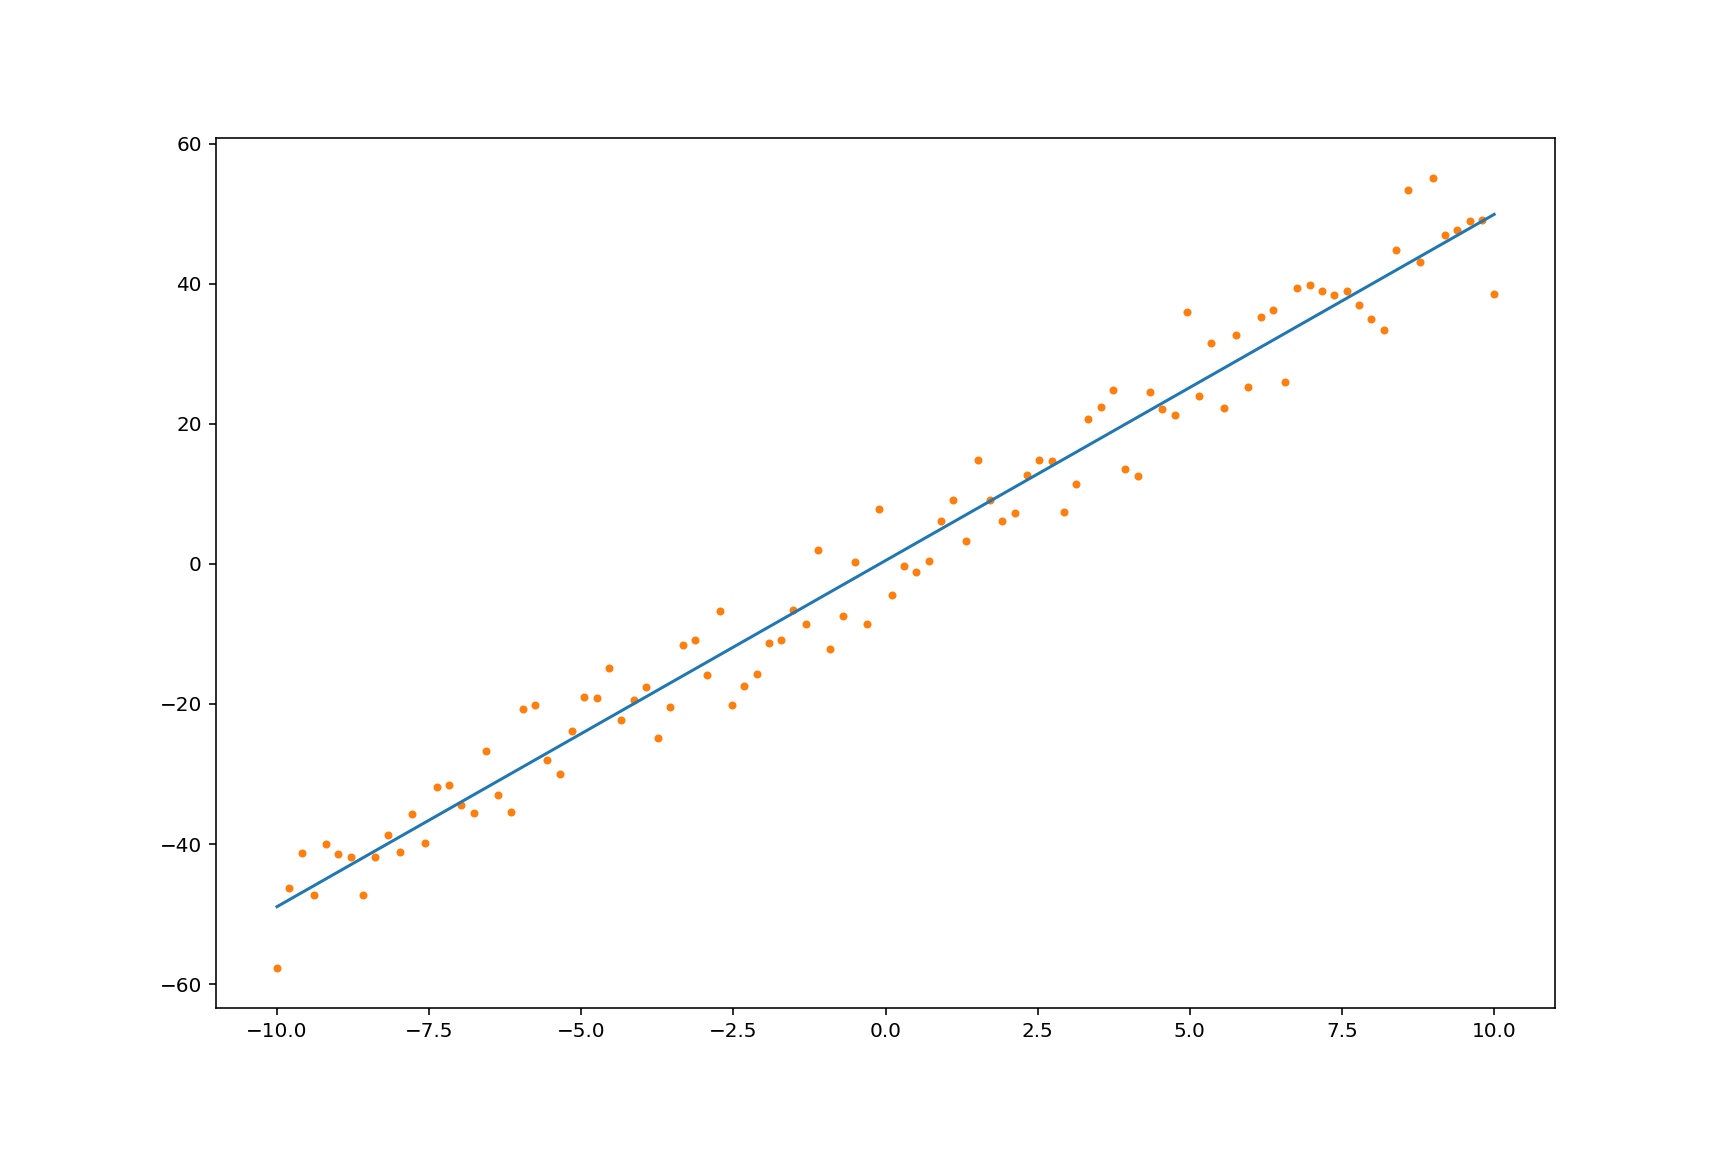

KeyboardInterrupt: 

In [69]:
trainer(model, device, optimiser=optimiser, niters=niters)

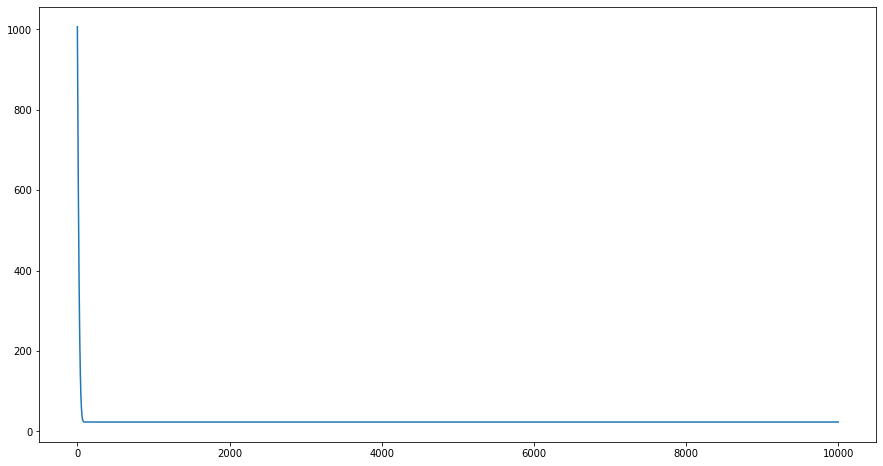

In [11]:
plt.plot(loss_recorder.results())

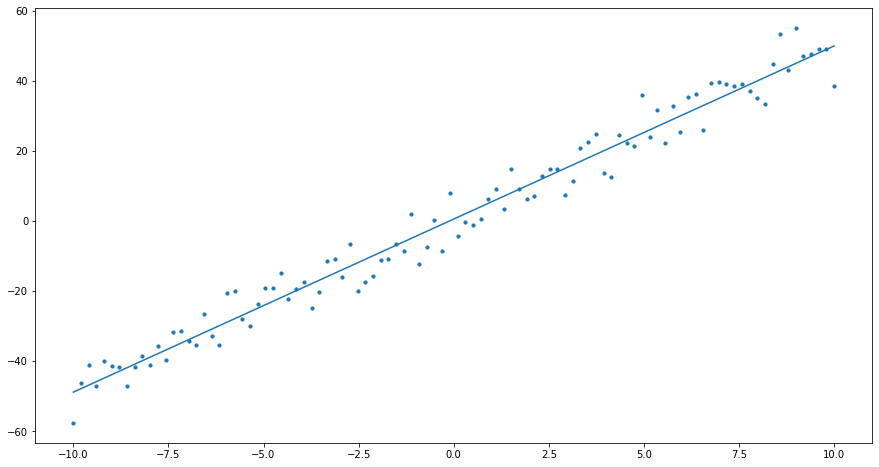

In [12]:
plt.scatter(x, y, s=10)
plt.plot(x, model(x.detach()).detach())

In [13]:
model.linear.weight, model.linear.bias

(Parameter containing:
 tensor([[4.9411]], requires_grad=True), Parameter containing:
 tensor([0.4792], requires_grad=True))